# Applying the concepts learned so far on a dataset from Kaggle
## Dataset - StudentsPerformace

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

# Load the dataset  
df=pd.read_csv("StudentsPerformance.csv")

#View the dataset
print(df)

     gender race/ethnicity parental level of education         lunch test preparation course  math score  reading score  writing score
0    female        group B           bachelor's degree      standard                    none          72             72             74
1    female        group C                some college      standard               completed          69             90             88
2    female        group B             master's degree      standard                    none          90             95             93
3      male        group A          associate's degree  free/reduced                    none          47             57             44
4      male        group C                some college      standard                    none          76             78             75
..      ...            ...                         ...           ...                     ...         ...            ...            ...
995  female        group E             master's degree 

In [2]:
# Basic info about the columns and data types
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [3]:
# Output Unique values for each columns
for col in df.columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Unique values in 'gender':
['female' 'male']

Unique values in 'race/ethnicity':
['group B' 'group C' 'group A' 'group D' 'group E']

Unique values in 'parental level of education':
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Unique values in 'lunch':
['standard' 'free/reduced']

Unique values in 'test preparation course':
['none' 'completed']

Unique values in 'math score':
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]

Unique values in 'reading score':
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  7

This will help in identifying - categorical or numerical features. 
- Categorical features will need encoding before modeling.
- Numerical features can be used as-is or can be scaled.

# Regression (prepareing the data for math score prediction)
- We will use the column - math score as labels and others as feature

In [4]:
#Seperating Features and target
X= df.drop(columns=['math score'])
y= df['math score']

In [5]:
# Encoding categorical variables (One-hot encoding)
X_encoded= pd.get_dummies(X, drop_first=True).astype(int) 
print(X_encoded.head())
print(X_encoded.columns.tolist())

   reading score  writing score  gender_male  race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  race/ethnicity_group E  parental level of education_bachelor's degree  parental level of education_high school  parental level of education_master's degree  parental level of education_some college  parental level of education_some high school  lunch_standard  test preparation course_none
0             72             74            0                       1                       0                       0                       0                                              1                                        0                                            0                                         0                                             0               1                             1
1             90             88            0                       0                       1                       0                       0                                            

In [6]:
#Splitting data into different sets

from sklearn.model_selection import train_test_split

# Creating test set (15%)
X_temp, X_test, y_temp, y_test = train_test_split(X_encoded,y,test_size=0.15, random_state=42)

# Creating Training (70%) and Validation set (15%)
X_train, X_val, y_train, y_val= train_test_split(X_temp,y_temp, test_size=15/85, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(700, 14)
(150, 14)
(150, 14)


In [7]:
#Normalization (rescaling numerical columns)

from sklearn.preprocessing import MinMaxScaler

# Columns to normalize
col_norm_X= ['reading score', 'writing score']


scaler=MinMaxScaler()

#Fit scaler on training numeric columns
scaler.fit(X_train[col_norm_X])


#Making copies to avoid changing original sets
X_train_norm = X_train.copy()
X_val_norm = X_val.copy()
X_test_norm = X_test.copy()

X_train_norm[col_norm_X] = scaler.transform(X_train[col_norm_X])
X_val_norm[col_norm_X] = scaler.transform(X_val[col_norm_X])
X_test_norm[col_norm_X] = scaler.transform(X_test[col_norm_X])

print(X_train_norm.head())
print(X_val_norm.head())

     reading score  writing score  gender_male  race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  race/ethnicity_group E  parental level of education_bachelor's degree  parental level of education_high school  parental level of education_master's degree  parental level of education_some college  parental level of education_some high school  lunch_standard  test preparation course_none
90        0.631579       0.694118            0                       0                       1                       0                       0                                              1                                        0                                            0                                         0                                             0               1                             1
751       0.631579       0.588235            1                       0                       0                       0                       1                                      

In [8]:
#Training the model using Linear Regression

from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train_norm, y_train)

LinearRegression()

In [9]:
# Predicting on validation set
y_val_pred=model.predict(X_val_norm)

In [10]:
# Evaluating the model performace

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

#Evalute predictions
mae=mean_absolute_error(y_val,y_val_pred)
rmse=np.sqrt(mean_squared_error(y_val, y_val_pred))

#Results
print(f"Mean absolute error: {mae:.2f}")
print(f"Root Mean squared error: {rmse:.2f}")

Mean absolute error: 4.19
Root Mean squared error: 5.14


# What if we didn't normalize ?

In [ ]:
#Training the model 

from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train, y_train)

# Predicting on validation set
y_val_pred_2=model.predict(X_val)


from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

#Evalute predictions
mae_2=mean_absolute_error(y_val,y_val_pred_2)
rmse_2=np.sqrt(mean_squared_error(y_val, y_val_pred_2))

#Results
print(f"Mean absolute error: {mae:.2f}")
print(f"Root Mean squared error: {rmse:.2f}")

Mean absolute error: 4.19
Root Mean squared error: 5.14


- It doesn't make much difference. Because we are using linear regression in which weights can adjust themselves. It would matter when we use regularization and features are on very different scales.
- It is also necessary for other algorithms like SVM, K-Nearest Neighbors, etc.
- So its a good practice to normalize (or standardise) the data.

## Now what ?
- We have Mean absolute error: 4.19 & Root Mean squared error: 5.14
- Can we improve it ? How?
- We can try other models, or improve the existing one.

## Improving the current model
### Check for Underfitting or Overfitting
- Compare Training error & Validation error
    - If both are high - underfitting
    - If training is low but validation is high - overfitting

In [12]:
# Training set predictions 
y_train_pred=model.predict(X_train)

#Error in Training data prediction
mae_train=mean_absolute_error(y_train, y_train_pred)
rmse_train= np.sqrt(mean_squared_error(y_train,y_train_pred))

#Result
print(f"Mean absoulute error in training data: {mae_train:.2f}")
print(f"Root Mean square error in training data: {rmse_train:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"Root Mean squared error: {rmse:.2f}")


Mean absoulute error in training data: 4.31
Root Mean square error in training data: 5.40
Mean absolute error: 4.19
Root Mean squared error: 5.14


- Both the errors are low - so the model generalizes well (neither too simple nor to complex)

## Understanding the data (may not be important when you are conserned only about performance)

### Check Linear Relationship with features
- If the no. of features are less - we can plot individual features - scatter plots or pairplots
- If the no. of features are more - we can use heatmaps or residual plots or feature selection + visualization

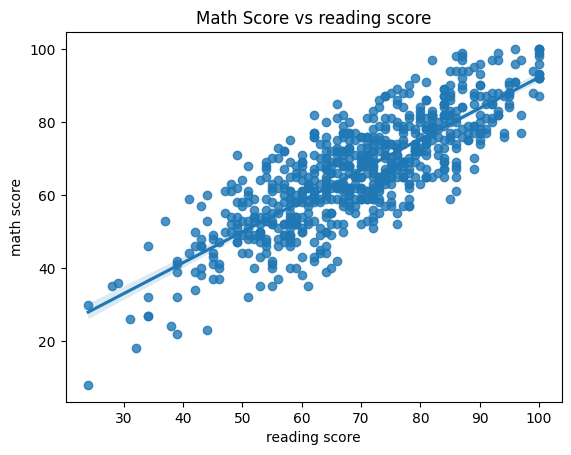

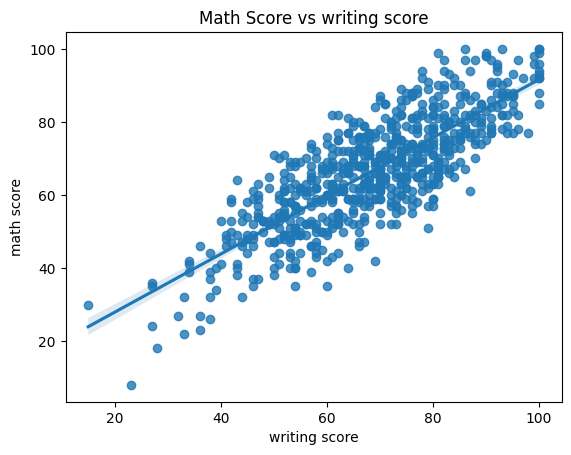

In [15]:
# Plotting labels against each feature

import matplotlib.pyplot as plt
import seaborn as sns

for col in ['reading score','writing score']:
    sns.regplot(x=X_train[col], y=y_train)
    plt.title(f"Math Score vs {col}")
    plt.show()


- These graphs are showing linear patterns. But still lets try other plots as well.

C:\Users\sriya\AppData\Local\Temp\ipykernel_28100\32169298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['math score'] = y_train


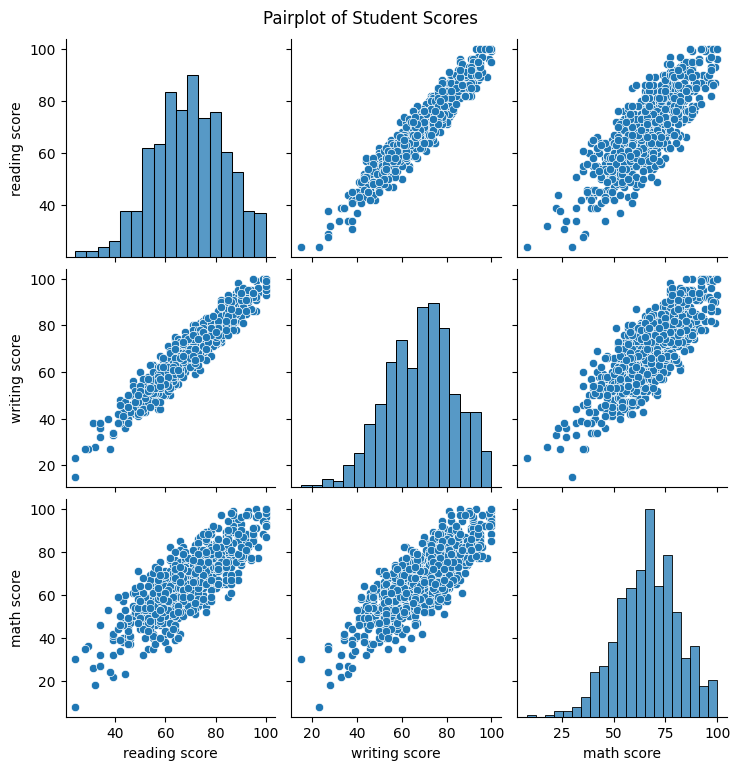

In [20]:
# Combine X and y for pairplot
train_df = X_train[['reading score', 'writing score']]
train_df['math score'] = y_train

# Plot pairplot
sns.pairplot(train_df)
plt.suptitle("Pairplot of Student Scores", y=1.02)
plt.show()



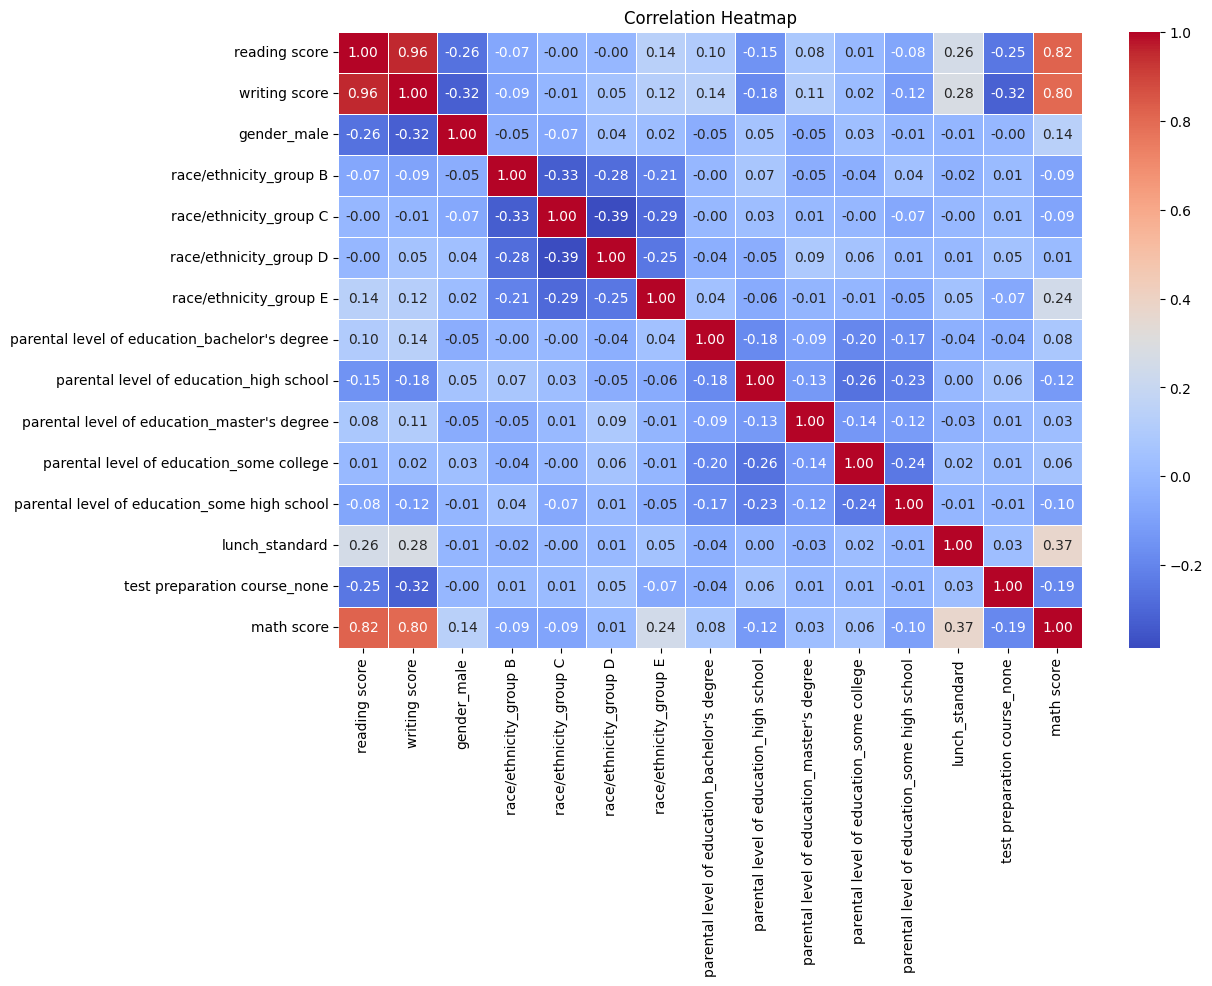

In [22]:
# Making Heatmap

import pandas as pd

# Create a copy with the target column added
data_for_heatmap = X_train_norm.copy()
data_for_heatmap['math score'] = y_train

#Compute corelation matrix
corr_matrix = data_for_heatmap.corr()

#Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


This shows there is not much correlation between maths scores and other feature except reading and writing score. So we can drop these additional features.

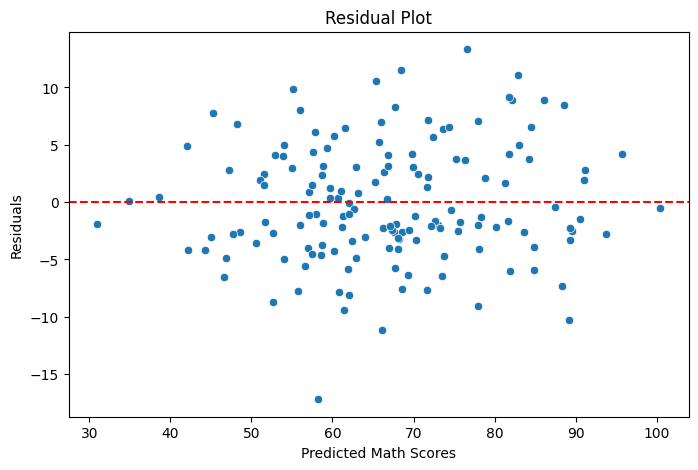

In [24]:
# Residual plot

# Calculate residuals
residuals = y_val - y_val_pred

# Plot residuals vs predicted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_val_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')  # horizontal line at 0
plt.xlabel('Predicted Math Scores')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

If it shows a pattern then it means the model is not fitting well (maybe non-linear).    
If it doesnt show a pattern instead the points are randomly scattered around zero then it indicates a good linear model. 

Although the current model is performing well. Lets still try to improve the current model 
- by using polynomial regression 
- by trying other algorithms and check how they perform. 